<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
# Write your code here
import pandas as pd

# Load the dataset
file_path = '/content/annotated_inception_reviews .csv'  # Update this to your file's path
data = pd.read_csv(file_path)
print(data.head())  # Inspect the first few entries




   Document ID                                         Clean data  Sentiment
0             2  My 3rd time watching this movie! Yet, it still...   neutral
1             3  You only get to watch this for the first time ...  negative
2             4  When you wake up from a good dream, you feel t...  positive
3             5  When I first watch this movie, I was just shoc...  positive
4             6  The 20th Century had Casablanca, Star Wars, th...  negative


In [ ]:
print(data.columns)

Index(['Document ID ', 'Clean data ', 'Sentiment'], dtype='object')


In [ ]:
# Importing necessary libraries for preprocessing and topic modeling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
import numpy as np


# Preprocess the text data (simple preprocessing step for demonstration purposes)
def preprocess_text(texts):
    # Lowercasing and removing punctuation and numbers (simple cleaning for topic modeling)
    texts = texts.str.lower()  # Convert to lower case
    texts = texts.str.replace(r'[^\w\s]+', '', regex=True)  # Remove punctuation
    texts = texts.str.replace(r'\d+', '', regex=True)  # Remove numbers
    return texts

# Apply the preprocessing to the text data
cleaned_text = preprocess_text(data['Clean data '])

# Vectorization for LDA and LSA (using CountVectorizer, common for these methods)
count_vectorizer = CountVectorizer(stop_words='english', max_features=10000)
text_vectorized = count_vectorizer.fit_transform(cleaned_text)

# Display the features (text representation) used for LDA and LSA
print("Features (text representation)", count_vectorizer.get_feature_names_out()[:20])  # Display first 20 features for brevity




Features (text representation) ['abandon' 'ability' 'able' 'abraham' 'abre' 'absent' 'absolute'
 'absolutely' 'absorb' 'absorbing' 'abstaining' 'abyss' 'academythat'
 'accent' 'accenti' 'accept' 'accessible' 'accompanied' 'accomplish'
 'achievement']


In [ ]:
# LDA Model Implementation
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda_model.fit_transform(text_vectorized)

# LSA Model Implementation (using TruncatedSVD)
lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_topics = lsa_model.fit_transform(text_vectorized)

# Function to display topics for LDA and LSA
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Number of top words to display for each topic
no_top_words = 10

# Display the top 10 topics from LDA
print("LDA Top Topics:")
display_topics(lda_model, count_vectorizer.get_feature_names_out(), no_top_words)

# Display the top 10 topics from LSA
print("\nLSA Top Topics:")
display_topics(lsa_model, count_vectorizer.get_feature_names_out(), no_top_words)


LDA Top Topics:
Topic 0:
film nolan inception cobb action like plot just emotional true
Topic 1:
dreams just movies great mind screen secrets idea start watch
Topic 2:
movie inception like movies nolan film story watch watching flawless
Topic 3:
film inception time action films just movie watch leonardo blockbuster
Topic 4:
movie reality good character inception lot going explaining dream exposition
Topic 5:
dream mission inception cobb movie did world past life mind
Topic 6:
inception nolan movie dicaprio impossible written performance cobb highly special
Topic 7:
movie nolan just like nolans movies cobb work man business
Topic 8:
film nolan movie films best effects dreams good director like
Topic 9:
movie dream inception story incredible think saw art film amazing

LSA Top Topics:
Topic 0:
film movie nolan inception dream cobb like time just films
Topic 1:
dream mission inception cobb did past world movie life team
Topic 2:
movie inception saw story think incredible movies amazing go

In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 24.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 18.3 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 8.9 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039287 sha256=b4db0285d388bc61cf888ff2ccc0fb446ca50f3e6d2b304dbd526a26cc21308a
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Foun

In [ ]:
from bertopic import BERTopic

# Create a BERTopic model
bertopic_model = BERTopic()

# Fit the model on the cleaned text data
topics, probabilities = bertopic_model.fit_transform(cleaned_text)

# Display the topics
bertopic_model.get_topic_info()


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,Topic,Count,Name,Representation,Representative_Docs
0,0,100,0_his_the_of_mission,"[his, the, of, mission, in, was, dream, past, ...",[my rd time watching this movie yet it still s...
1,1,100,1_it_my_cinema_is,"[it, my, cinema, is, and, disturbing, carefull...",[you only get to watch this for the first time...
2,2,100,2_been_busyness_exposition_never,"[been, busyness, exposition, never, explaining...",[inception might have been a better movie and...
3,3,100,3_but_you_incredible_saw,"[but, you, incredible, saw, and, to, think, th...",[i have been reading nothing but good reviews ...
4,4,100,4_going_to_bring_dreams,"[going, to, bring, dreams, fight, ariadne, lev...",[the central idea of inception is an interesti...
5,5,100,5_you_at_the_by,"[you, at, the, by, rewards, that, film, litera...",[dom cobb leads a highly skilled team speciali...
6,6,100,6_or_film_the_to,"[or, film, the, to, some, of, in, so, it, that]",[the film is a disappointment because it did s...
7,7,100,7_the_his_of_is,"[the, his, of, is, for, to, surrealism, in, an...",[surrealism can appear to be ineffably bizarre...
8,8,100,8_art_we_care_premise,"[art, we, care, premise, thats, our, is, peopl...",[if one goes to an art gallery to see a provoc...
9,9,100,9_is_film_the_of,"[is, film, the, of, blockbuster, this, in, thr...",[what do we ask for in a summer blockbuster wh...


In [ ]:


from bertopic import BERTopic

# Create a BERTopic model with the English language model (change if your dataset is in another language)
bertopic_model = BERTopic(language='english', calculate_probabilities=True, verbose=True)

# Fit the model on the cleaned text data
topics, probabilities = bertopic_model.fit_transform(cleaned_text.tolist())

# Get the overall topic info which includes the size and count
topic_info = bertopic_model.get_topic_info()

# Display the top 10 topics
print(topic_info.head(11))  # Top 10 topics plus the header row

# Function to display each topic with its summary
def display_bertopic_summary(bertopic_model, n_topics):
    for topic_num in range(n_topics):
        if topic_num == -1:
            continue  # Skip the outlier topic if present
        topic_words = bertopic_model.get_topic(topic_num)
        print(f"Topic {topic_num}: {topic_words}")

# Display summaries for the top 10 topics found by BERTopic
display_bertopic_summary(bertopic_model, 10)


2024-04-28 18:37:51,880 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/79 [00:00<?, ?it/s]

2024-04-28 18:38:10,435 - BERTopic - Embedding - Completed ✓
2024-04-28 18:38:10,438 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-04-28 18:38:39,000 - BERTopic - Dimensionality - Completed ✓
2024-04-28 18:38:39,002 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-04-28 18:38:39,202 - BERTopic - Cluster - Completed ✓
2024-04-28 18:38:39,208 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-04-28 18:38:40,275 - BERTopic - Representation - Completed ✓


    Topic  Count                              Name  \
0       0    100              0_his_the_of_mission   
1       1    100                 1_it_my_cinema_is   
2       2    100  2_been_busyness_exposition_never   
3       3    100          3_but_you_incredible_saw   
4       4    100           4_going_to_bring_dreams   
5       5    100                   5_you_at_the_by   
6       6    100                  6_or_film_the_to   
7       7    100                   7_the_his_of_is   
8       8    100             8_art_we_care_premise   
9       9    100                  9_is_film_the_of   
10     10    100                 10_as_in_the_film   

                                       Representation  \
0   [his, the, of, mission, in, was, dream, past, ...   
1   [it, my, cinema, is, and, disturbing, carefull...   
2   [been, busyness, exposition, never, explaining...   
3   [but, you, incredible, saw, and, to, think, th...   
4   [going, to, bring, dreams, fight, ariadne, lev...   
5   [you,

In [ ]:
# Function to display topics with descriptive summaries for LDA and LSA
def display_topics_with_descriptions(model, feature_names, no_top_words):
    topic_descriptions = [
        "Focuses on the technical and emotional elements of filmmaking.",
        "Concentrates on the thematic exploration of dreams.",
        "Expressions of sentiment and opinion regarding the movie.",
        "Discusses the film as a blockbuster, with a focus on action scenes.",
        "Deals with the plot complexity and intricacies.",
        "Explores character journeys and interactions with the dream world.",
        "Praises the performances, writing, and special effects.",
        "Focuses on directorial style and techniques.",
        "Highlights cinematic qualities and overall direction.",
        "Appreciates the storytelling and creative narrative techniques."
    ]  # These need to be customized based on actual top words from each topic
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        topic_words = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(topic_words)
        if topic_idx < len(topic_descriptions):
            print(f"Description: {topic_descriptions[topic_idx]}\n")
        else:
            print("Description: Additional topics not pre-defined.\n")

# Display the topics with descriptions from the LDA model
print("LDA Top Topics with Descriptions:")
display_topics_with_descriptions(lda_model, count_vectorizer.get_feature_names_out(), no_top_words)

# Display the topics with descriptions from the LSA model
print("\nLSA Top Topics with Descriptions:")
display_topics_with_descriptions(lsa_model, count_vectorizer.get_feature_names_out(), no_top_words)


LDA Top Topics with Descriptions:
Topic 0:
film nolan inception cobb action like plot just emotional true
Description: Focuses on the technical and emotional elements of filmmaking.

Topic 1:
dreams just movies great mind screen secrets idea start watch
Description: Concentrates on the thematic exploration of dreams.

Topic 2:
movie inception like movies nolan film story watch watching flawless
Description: Expressions of sentiment and opinion regarding the movie.

Topic 3:
film inception time action films just movie watch leonardo blockbuster
Description: Discusses the film as a blockbuster, with a focus on action scenes.

Topic 4:
movie reality good character inception lot going explaining dream exposition
Description: Deals with the plot complexity and intricacies.

Topic 5:
dream mission inception cobb movie did world past life mind
Description: Explores character journeys and interactions with the dream world.

Topic 6:
inception nolan movie dicaprio impossible written performance

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
# Attempting to load the dataset with the exact filename as it was uploaded
# Now that we have confirmed the filename, let's try loading the data one more time
correct_filename = '/content/annotated_inception_reviews .csv'  # Confirming the space in the filename

# Load the data
data = pd.read_csv(correct_filename)

# Display the first few rows to confirm it's loaded correctly
data.head()


,Document ID,Clean data,Sentiment
0,2,"My 3rd time watching this movie! Yet, it still...",neutral
1,3,You only get to watch this for the first time ...,negative
2,4,"When you wake up from a good dream, you feel t...",positive
3,5,"When I first watch this movie, I was just shoc...",positive
4,6,"The 20th Century had Casablanca, Star Wars, th...",negative


In [ ]:
data.describe()

,Document ID
count,2500.00000
mean,1251.50000
std,721.83216
min,2.00000
25%,626.75000
50%,1251.50000
75%,1876.25000
max,2501.00000


**Selected Features for Sentiment Classification:Selected Features for Sentiment Classification:**


Text of the Review (Clean data):

Importance: The text is so much more crucial since it is direct art that verbally expresses the thoughts and emotions of the author. To pull this, analysts consider the choice of words, context of the communication, and structure of the sentences while working on sentiment analysis. Models will inevitably achieve this skill based on these textual properties.

Length of the Review:

Importance: Duration can be used as an illustration of the depth of sentiment that the film is capable of touching upon. Reviews which are brief could be the case of name dropping, while long reviews may give more of a detailed and in-depth feedback. This statistic can either be predictive of sentiment intensity or detail level theses can reveal.

Count of Positive and Negative Words:Count of Positive and Negative Words:

Importance: Through the way generally positive or negative words are counted, the models create a fast term of reference determining the mood of the review. Such strategy applies to word sentiment lexicons as a method for computation of sentiment intensity (based on the amount of words with predictive power).

Presence of Exclamation Marks and Question Marks:Presence of Exclamation Marks and Question Marks:

Importance: Exclamation marks can be used to express /highlight positive emotions or excitement which can link sentiment analysis. Possibly these interrogations are about a person being lost or can be confused, making the evaluation of sentiment more complexly accurate.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Vectorize the text data with TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Step 2: Initialize the two models
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
# Support Vector Machine with a linear kernel and standardized features
svm_model = make_pipeline(StandardScaler(with_mean=False), SVC(kernel='linear'))

# Split the dataset into features and target variable
X = data['Clean data ']
y = data['Sentiment']

# Step 3: Perform 5-fold cross-validation on each model
# Note: Cross-validation can be computationally expensive with text data, especially with SVM.
# If computational resources are limited, we may consider reducing the size of the dataset or the number of folds.

# For Logistic Regression
print("Logistic regression with fold 5")
logistic_cv_scores = cross_val_score(logistic_model, tfidf_vectorizer.fit_transform(X), y, cv=5)
# For SVM
print("SVM with fold 5")
svm_cv_scores = cross_val_score(svm_model, tfidf_vectorizer.transform(X), y, cv=5)

# Display the cross-validation results
logistic_cv_scores, svm_cv_scores


(array([0.318, 0.336, 0.308, 0.356, 0.32 ]),
 array([0.318, 0.358, 0.3  , 0.356, 0.324]))

In [ ]:
# For Logistic Regression
print("Logistic regression and SVM with fold 10")
logistic_cv_scores = cross_val_score(logistic_model, tfidf_vectorizer.fit_transform(X), y, cv=10)

# For SVM
svm_cv_scores = cross_val_score(svm_model, tfidf_vectorizer.transform(X), y, cv=10)

# Display the cross-validation results
logistic_cv_scores, svm_cv_scores


Logistic regression and SVM with fold 10


(array([0.28 , 0.364, 0.316, 0.38 , 0.36 , 0.3  , 0.336, 0.364, 0.276,
        0.324]),
 array([0.292, 0.364, 0.304, 0.368, 0.364, 0.284, 0.352, 0.348, 0.276,
        0.324]))

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectorizer.transform(X), y, test_size=0.2, random_state=42)

# Initialize a new Logistic Regression model and SVM model (with pipeline)
logistic_model = LogisticRegression(max_iter=1000)
svm_pipeline = make_pipeline(StandardScaler(with_mean=False), SVC(kernel='linear'))

# Fit the Logistic Regression model
logistic_model.fit(X_train, y_train)
# Fit the SVM model
svm_pipeline.fit(X_train, y_train)

# Predict on the test set
logistic_predictions = logistic_model.predict(X_test)
svm_predictions = svm_pipeline.predict(X_test)

# Calculate performance metrics for Logistic Regression
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions, average='weighted')
logistic_recall = recall_score(y_test, logistic_predictions, average='weighted')
logistic_f1 = f1_score(y_test, logistic_predictions, average='weighted')

# Calculate performance metrics for SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

# Compile the performance metrics into a dictionary for easy comparison
performance_comparison = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': [logistic_accuracy, logistic_precision, logistic_recall, logistic_f1],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1]
}

# Convert the dictionary to a DataFrame for a nicer display
performance_df = pd.DataFrame(performance_comparison)
performance_df


,Metric,Logistic Regression,SVM
0,Accuracy,0.338000,0.340000
1,Precision,0.338899,0.340662
2,Recall,0.338000,0.340000
3,F1 Score,0.338079,0.339896


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [ ]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Display the first few rows of the training data
print(train_data.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

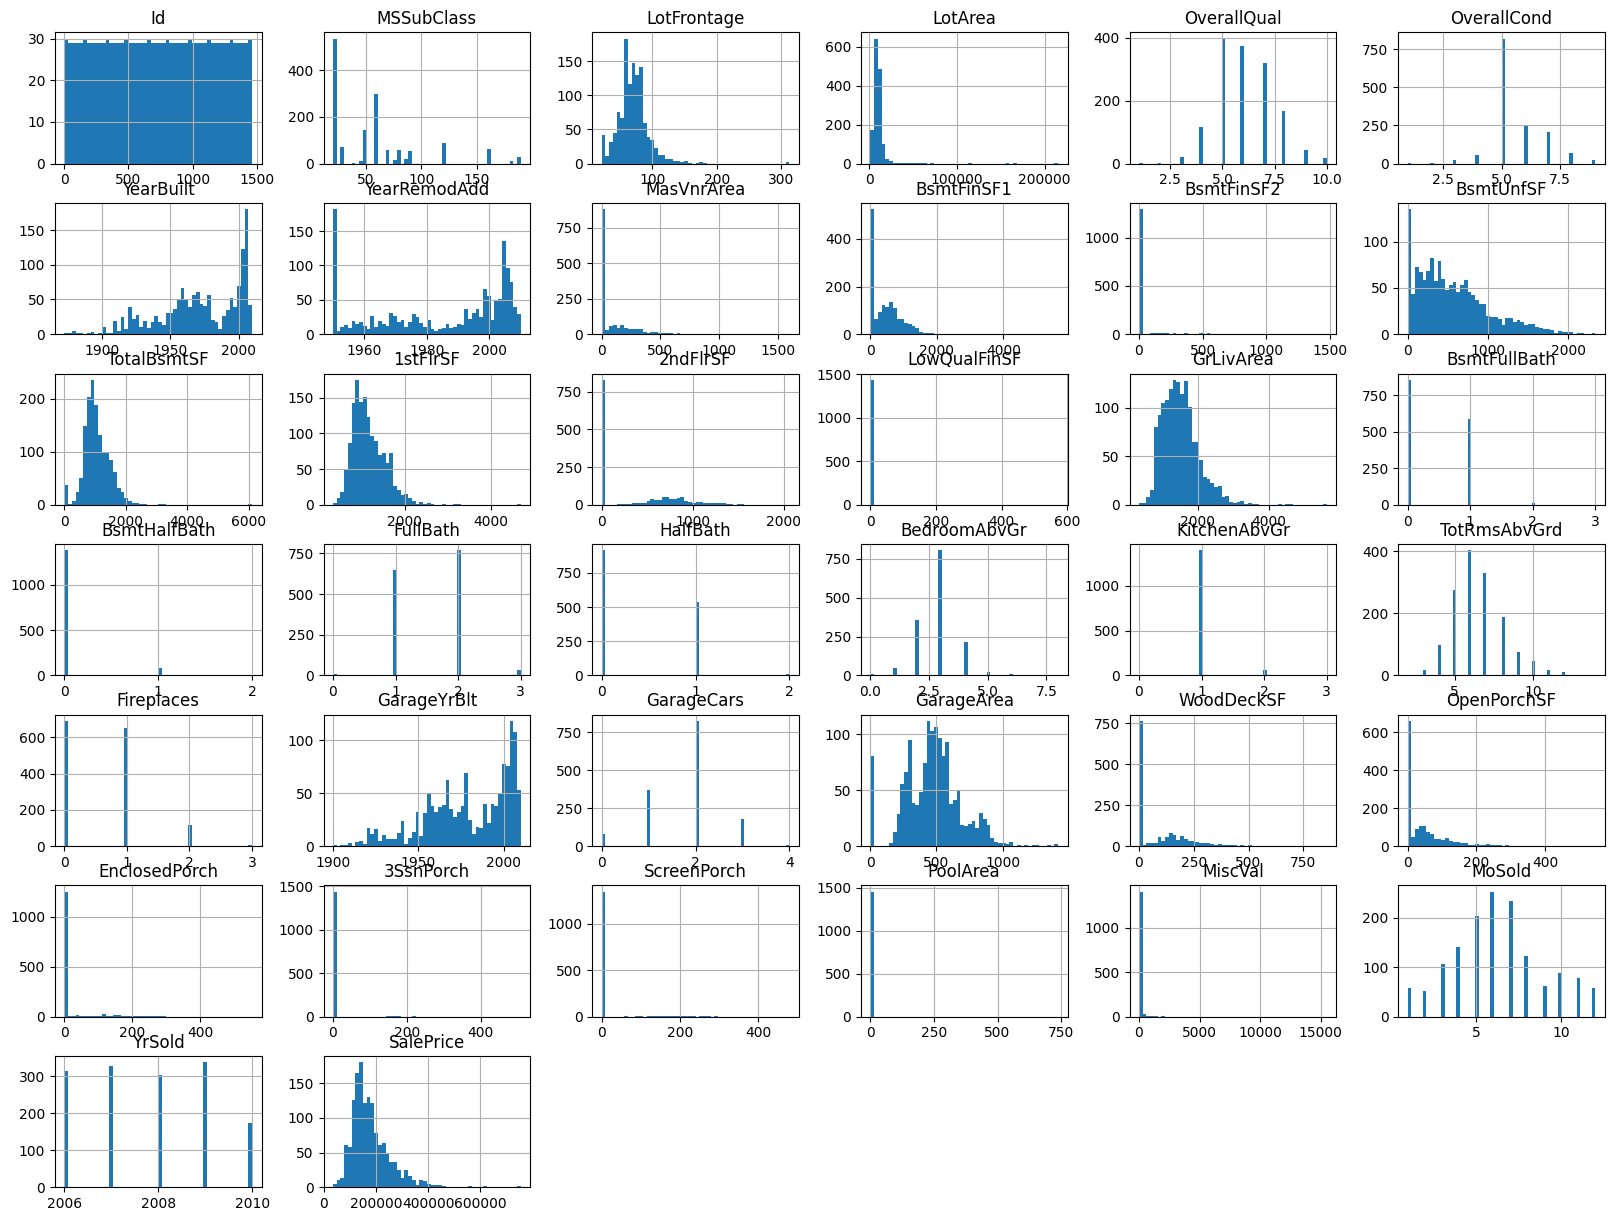

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

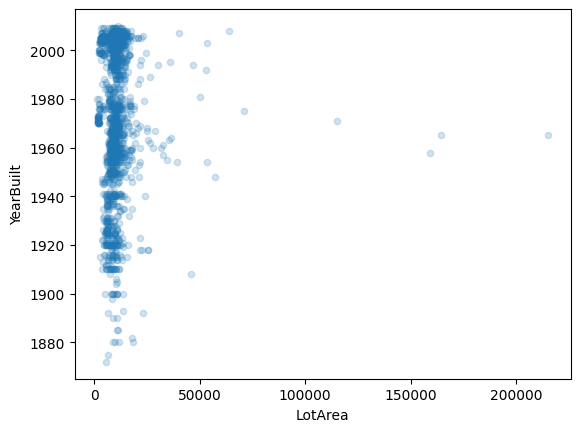

In [ ]:
train_data.plot(kind="scatter", x="LotArea", y="YearBuilt", alpha=0.2)
plt.savefig('map1.png')

<Axes: xlabel='LotArea', ylabel='YearBuilt'>

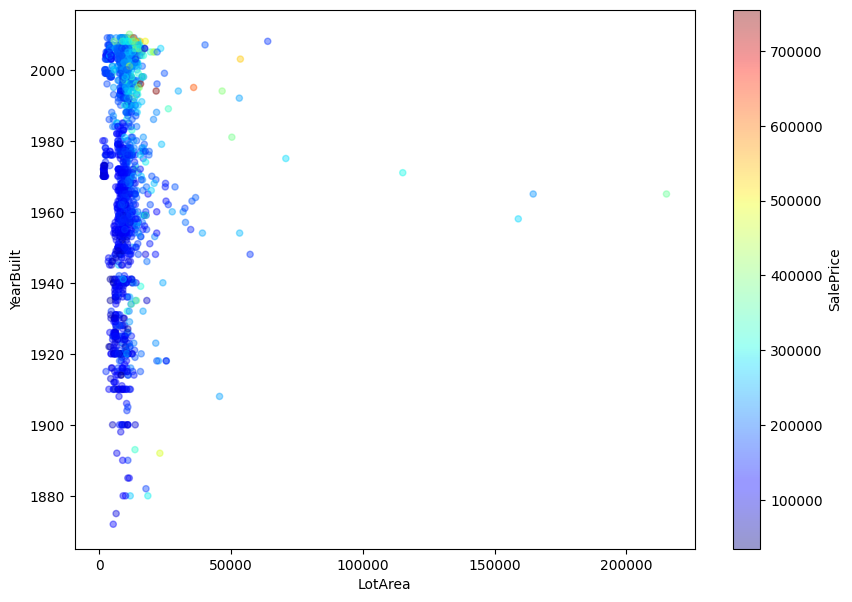

In [ ]:
train_data.plot(kind="scatter", x="LotArea", y="YearBuilt", alpha=0.4, figsize=(10,7),c="SalePrice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [ ]:
# Display basic information and statistics
print(train_data.info())
print(train_data.describe())

# Check for missing values
print(train_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

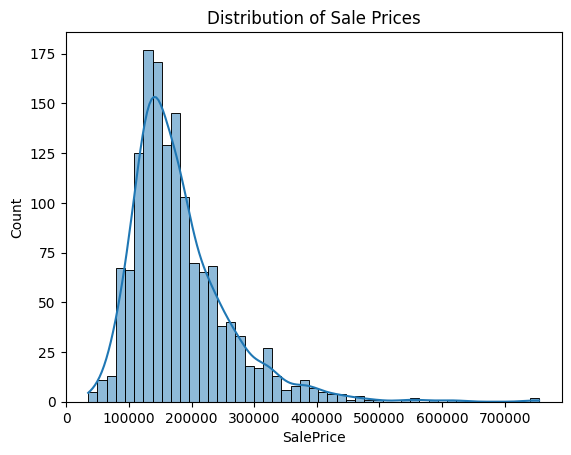

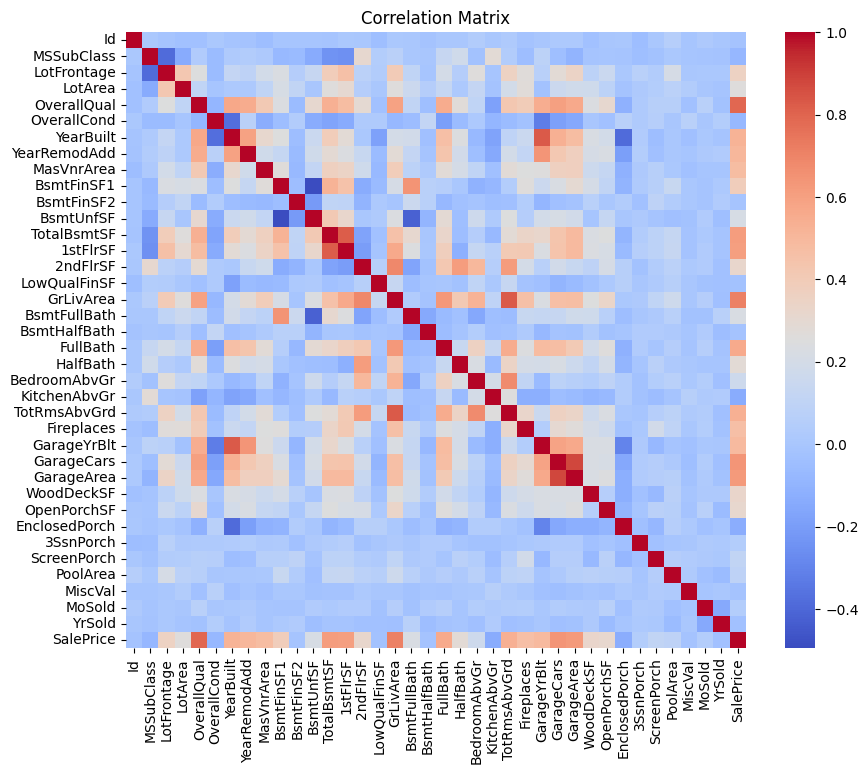

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print(train_data.describe(include=[np.number]))  # ensures only numeric columns are described

# Plotting distributions of the target variable 'SalePrice'
# Ensure 'SalePrice' is in train_data and is numeric
if 'SalePrice' in train_data.columns and pd.api.types.is_numeric_dtype(train_data['SalePrice']):
    sns.histplot(train_data['SalePrice'], kde=True)
    plt.title('Distribution of Sale Prices')
    plt.show()
else:
    print("SalePrice column is missing or not numeric.")

# Prepare data for correlation matrix - include only numeric columns
numeric_cols = train_data.select_dtypes(include=[np.number])
if not numeric_cols.empty:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_cols.corr(), annot=False, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numeric columns available for correlation.")

In [ ]:
# Filling missing values
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        train_data[column] = train_data[column].fillna(train_data[column].mode()[0])
    else:
        train_data[column] = train_data[column].fillna(train_data[column].mean())

# Example of outlier handling (if necessary, based on the data exploration)
# Assuming 'GrLivArea' as an example where large values are considered outliers
q99 = train_data['GrLivArea'].quantile(0.99)
train_data = train_data[train_data['GrLivArea'] < q99]


In [ ]:
train_data['House_Age'] = train_data['YrSold'] - train_data['YearBuilt']
train_data = pd.get_dummies(train_data, drop_first=True)
from sklearn.model_selection import train_test_split

X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the train/test data to ensure splitting was successful
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1156, 245) (289, 245) (1156,) (289,)


In [ ]:
correlation_matrix = train_data.corr()
print(correlation_matrix['SalePrice'].sort_values(ascending=False))


SalePrice           1.000000
OverallQual         0.802568
GrLivArea           0.701919
GarageCars          0.651746
TotalBsmtSF         0.647885
                      ...   
BsmtQual_TA        -0.522753
KitchenQual_TA     -0.534683
GarageFinish_Unf   -0.545653
House_Age          -0.566026
ExterQual_TA       -0.611437
Name: SalePrice, Length: 246, dtype: float64


In [ ]:
print(train_data.columns)
train_data = pd.read_csv('/content/train.csv')
print(train_data.head())


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=246)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   N

In [ ]:
# Ensure these columns are in your DataFrame
columns_to_select = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
                     'Neighborhood', 'BsmtQual', 'KitchenQual', 'GarageType', 'LotArea', 'YearBuilt']

# Check if all these columns are in the DataFrame
missing_columns = [col for col in columns_to_select if col not in train_data.columns]
if not missing_columns:
    selected_features = train_data[columns_to_select]
    selected_features = pd.get_dummies(selected_features, drop_first=True)
    print("Features selected and dummies created successfully!")
else:
    print("These columns are missing from the DataFrame:", missing_columns)


These columns are missing from the DataFrame: ['Neighborhood', 'BsmtQual', 'KitchenQual', 'GarageType']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Assuming 'train_data' is already loaded and preprocessed
# Identify categorical columns needing encoding (adjust list as necessary)
categorical_cols = ['Neighborhood', 'BsmtQual', 'KitchenQual', 'GarageType']

# Use pd.get_dummies to convert categorical columns to one-hot encoding
train_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)

# List of all necessary columns, now including newly created dummy columns
columns_needed = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
                  'LotArea', 'YearBuilt']
columns_needed.extend([col for col in train_data.columns if any(c in col for c in categorical_cols)])

# Select features and target
X = train_data[columns_needed]
y = train_data['SalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict the values for the training set
y_pred = model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print("Model Training Performance:")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Model Training Performance:
Mean Squared Error: 1001177600.0929674
R^2 Score: 0.8321453359688966


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Predict the values for the test set
y_pred_test = model.predict(X_test)

# Calculate the metrics for the test set
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Display the metrics
print("Test Set Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("R-squared (R²):", r2_test)
print("Mean Absolute Error (MAE):", mae_test)


Test Set Evaluation Metrics:
Mean Squared Error (MSE): 1148062521.701523
Root Mean Squared Error (RMSE): 33883.07131447094
R-squared (R²): 0.8503241595349903
Mean Absolute Error (MAE): 20901.989702704235


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


1. The model which i have used as Pre-trained Language Model (PLM) from the Hugging Face Repository is **facebook/bart-large-mnli** is based on BART (Bidirectional and Auto-Regressive Transformers), which is a model designed by Facebook AI. BART is unique as it combines both autoencoding and autoregressive techniques, making it a versatile tool for a variety of natural language processing tasks.

BART is structured as a denoising autoencoder for pretraining sequence-to-sequence models. This means it is trained to reconstruct original text from corrupted versions. The corruption is done by an arbitrary noising function (like token masking, deletion, text infilling, etc.) applied to the text. This approach forces BART to learn a robust representation of the input data that can effectively recover the original text, thereby understanding the underlying structure and context of the language.

**parameters:**~400 Million Parameters: This large number of parameters allows BART to capture and model complex patterns in the data. The model's capacity (number of parameters) enables it to perform well on tasks requiring an understanding of nuanced language features and intricate dependencies within the text.


In [4]:
!pip install transformers flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 72.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 30.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 100.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 13.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py

In [1]:
# Data processing
import pandas as pd

# Hugging Face model
from transformers import pipeline

# Import flair pre-trained sentiment model
from flair.models import TextClassifier
classifier = TextClassifier.load('en-sentiment')

# Import flair Sentence to process input text
from flair.data import Sentence

# Import accuracy_score to check performance
from sklearn.metrics import accuracy_score

2024-04-28 17:41:34,078 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpcmv6d14e


100%|██████████| 253M/253M [00:19<00:00, 13.4MB/s]

2024-04-28 17:41:54,781 copying /tmp/tmpcmv6d14e to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2024-04-28 17:41:55,459 removing temp file /tmp/tmpcmv6d14e


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [2]:
# Read in data
amz_review = pd.read_csv('/content/amazon_cells_labelled.txt', sep='\t', names=['review', 'label'])

# Take a look at the data
amz_review.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
# Get the dataset information
print(amz_review.info())
# Check the label distribution
amz_review['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


label
0    500
1    500
Name: count, dtype: int64

In [4]:
# Define pipeline
classifier = pipeline(task="zero-shot-classification",
                      model="facebook/bart-large-mnli",
                      device=0)

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [5]:
# Put reviews in a list
sequences = amz_review['review'].to_list()

# Define the candidate labels
candidate_labels = ["positive", "negative"]

# Set the hyppothesis template
hypothesis_template = "The sentiment of this review is {}."

# Prediction results
hf_prediction = classifier(sequences, candidate_labels, hypothesis_template=hypothesis_template)

# Save the output as a dataframe
hf_prediction = pd.DataFrame(hf_prediction)

# Take a look at the data
hf_prediction.head()

,sequence,labels,scores
0,So there is no way for me to plug it in here i...,"[negative, positive]","[0.8545544743537903, 0.14544545114040375]"
1,"Good case, Excellent value.","[positive, negative]","[0.9976164102554321, 0.0023835941683501005]"
2,Great for the jawbone.,"[positive, negative]","[0.9928712248802185, 0.007128709927201271]"
3,Tied to charger for conversations lasting more...,"[negative, positive]","[0.9851537346839905, 0.014846223406493664]"
4,The mic is great.,"[positive, negative]","[0.9943009614944458, 0.005698999855667353]"


In [6]:
# The column for the predicted topic
hf_prediction['hf_prediction'] = hf_prediction['labels'].apply(lambda x: x[0])

# Map sentiment values
hf_prediction['hf_prediction'] = hf_prediction['hf_prediction'].map({'positive': 1, 'negative': 0})

# The column for the score of predicted topic
hf_prediction['hf_predicted_score'] = hf_prediction['scores'].apply(lambda x: x[0])

# The actual labels
hf_prediction['true_label'] = amz_review['label']

# Drop the columns that we do not need
hf_prediction = hf_prediction.drop(['labels', 'scores'], axis=1)

# Take a look at the data
hf_prediction.head()

,sequence,hf_prediction,hf_predicted_score,true_label
0,So there is no way for me to plug it in here i...,0,0.854554,0
1,"Good case, Excellent value.",1,0.997616,1
2,Great for the jawbone.,1,0.992871,1
3,Tied to charger for conversations lasting more...,0,0.985154,0
4,The mic is great.,1,0.994301,1


In [7]:
# Compare Actual and Predicted
accuracy_score(hf_prediction['hf_prediction'], hf_prediction['true_label'])

0.969

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(hf_prediction['true_label'], hf_prediction['hf_prediction'], average='weighted')
recall = recall_score(hf_prediction['true_label'], hf_prediction['hf_prediction'], average='weighted')
f1 = f1_score(hf_prediction['true_label'], hf_prediction['hf_prediction'], average='weighted')

print(f"Accuracy: {accuracy_score(hf_prediction['true_label'], hf_prediction['hf_prediction']):.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9690
Precision: 0.9697
Recall: 0.9690
F1 Score: 0.9690


#**3**

**Advantages**: **Zero-Shot Learning:**

Efficiency in Application: Zero-shot learning enables the model to classify text into categories that it wasn't explicitly trained on. This is particularly useful when labeled data is scarce or unavailable, as it removes the need for task-specific training. By relying on its generalized understanding gained during pretraining, the model can apply this knowledge to new tasks, reducing time and resource expenditure on data collection and model training.
**Disadvantages**:**High Computational Demand:**
Resource Intensiveness: Large models like BART, with hundreds of millions of parameters, require significant computational power. This includes high RAM and GPU requirements, which can be costly and limit the model's applicability in resource-constrained environments or for individual researchers and small organizations.

**Challenges**
 Processing large datasets with a complex model like BART challenged due to its computational demands and due to GPU requirements i couldnot complete it with the dataset which i have used for the assignmnet 3 but i have used another simple sentiment anlysis dataset and implemented teh pretrained model and its metrics.

As i dont have the resources of effiecient hardware with high RAM and GPU availability i have choosed the anotehr datset for this task with sentiment analysis.